## * import *

In [1]:
# !pip install autopep8

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

tf.__version__, keras.__version__

('2.8.0', '2.8.0')

## mnist 간단한 지도학습 예제

In [39]:
from keras.datasets import mnist

a = mnist.load_data()

In [40]:
type(a)

tuple

In [9]:
a.count

<function tuple.count(value, /)>

In [25]:
len(a)

2

In [32]:
len(a[0][0])

60000

In [33]:
tup_a, tup_b = a

In [44]:
len(tup_b[0])

10000

In [41]:
(train_images, train_labels), (test_images, test_labels) = a

In [42]:
len(train_images)

60000

In [43]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
len(train_images)

60000

In [45]:
from keras import models
from keras import layers

network = models.Sequential()

In [46]:
network.add(layers.Dense(50, activation="relu", ))
network.add(layers.Dense(10, activation="softmax" ))

In [47]:
network.compile(optimizer="rmsprop",
               loss="categorical_crossentropy",
               metrics=['accuracy'])

In [61]:
train_images.shape

(60000, 784)

In [62]:
train_images.dtype

dtype('uint8')

In [63]:
type(train_images)

numpy.ndarray

In [64]:
train_images = train_images.reshape((60000, 28 * 28))
train_images.astype('float32') / 255

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
train_images.shape

(60000, 784)

In [67]:
test_images = test_images.reshape((10000, 28 * 28))
test_images.astype('float32') / 255

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### label 값 -> 범주형인코딩

In [52]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### fit, 평가

In [68]:
network.fit(train_images, train_labels, batch_size=128, epochs=5 )

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2876 - accuracy: 0.9383
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2569 - accuracy: 0.9412
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2374 - accuracy: 0.9454
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2259 - accuracy: 0.9483
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2126 - accuracy: 0.9513


In [69]:
loss, acc = network.evaluate(test_images, test_labels)

 29/313 [=>............................] - ETA: 1s - loss: 2.4843 - accuracy: 0.0905 

2022-04-16 16:00:32.791107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 2.4666 - accuracy: 0.0974


In [72]:
y = network.predict(test_images)
y

array([[0.15957327, 0.05219023, 0.07214696, ..., 0.05821044, 0.27737448,
        0.11582608],
       [0.15557684, 0.0527869 , 0.07184931, ..., 0.0586249 , 0.28337017,
        0.11516364],
       [0.16048786, 0.05187853, 0.07169598, ..., 0.05829059, 0.27960083,
        0.11453345],
       ...,
       [0.16048984, 0.05181932, 0.07031538, ..., 0.05888481, 0.279299  ,
        0.11584821],
       [0.16028018, 0.05182697, 0.07138306, ..., 0.05861071, 0.2798731 ,
        0.11418043],
       [0.16025645, 0.05186785, 0.07139947, ..., 0.05839759, 0.28014177,
        0.1144239 ]], dtype=float32)

In [73]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 데이터 표현 - tensor

In [91]:
#0D 스칼라 (숫자..)
import numpy as np

x = np.array(10)
x
# x.dtype 
# x.shape
# x.ndim

array(10)

In [94]:
#1D 벡터 (배열, 리스트)
x = np.array( [ 1,2,3,4,5] )
x
# x.dtype 
# x.shape
# x.ndim

dtype('int64')

In [96]:
#2D 행렬 
x = np.array( [[5,6,7,8],
              [10,20,30,40],
              [-1,-2,-3,-4]] )
x
# x.dtype 
# x.shape
# x.ndim

2

In [104]:
#3D~ 고차원 텐서 
x = np.array( [[[5,6,7,8,9], 
                [50,60,70,80,90], 
                [500,600,700,800,900],
                [5000,6000,7000,8000,9000]],
               
               [[1,2,3,4,5], 
                [10,20,30,40,50],
                [100,200,300,400,500],
                [1000,2000,3000,4000,5000]],
              
               [[-1,-2,-3,-5,-6],
                [-10,-20,-30,-40,-60],
                [-100,-200,-300,-400,-600],
                [-1000,-2000,-3000,-4000,-6000]] ])
x
x.shape
# x.ndim

(3, 4, 5)

### 심화 mnist data set 자세히 살펴보기

In [111]:
(train_images, train_labels), (test_images, test_labels) = a
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


In [112]:
digit = train_images[4]
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

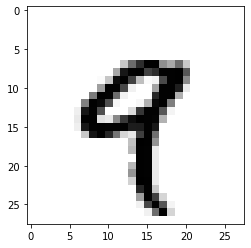

In [121]:
import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
#imshow = image show 이미지 출력.
#cmap = color map 색상 설정 : https://matplotlib.org/stable/tutorials/colors/colormaps.html document

In [123]:
#슬라이싱

my_slice = train_images[10:100] # 11~100 index
my_slice
my_slice.shape

(90, 28, 28)

In [124]:
my_slice2 = train_images[10:100, :, :]
my_slice2.shape

(90, 28, 28)

In [125]:
my_slice3 = train_images[10:100, 0:27, 0:27]
my_slice3.shape

(90, 27, 27)

In [126]:
# 배치 

batch = train_images[:128]
batch.shape
# 의미 해석 : train_set 의 첫 번째~128번째 이미지 까지 묶은 batch

(128, 28, 28)

In [129]:
train_images[127].shape
# train_set 에서 127번째 이미지만 선택.

(28, 28)

In [130]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

## 신경망-수학적 배경지식

### 텐서 연산 - np.dot()

In [132]:
'''
    numpy dot(x, y) : 
        
        내적 행렬 곱 연산
    
'''
# 1차원*1차원 내적

a = [1,2]
b = [2,3]
np.dot(a, b)

8

In [135]:
# 2차원*2차원 내적

a = np.array([[1, 3], [2, 4]])
b = np.array([[1, 6], [3, 0]])

np.dot(a, b)

array([[10,  6],
       [14, 12]])

In [134]:
# n차원*m차원 내적

a = np.array([[1, 3], [2, 4]])
b = np.array([[[1, 1], [0, 1]], [[0, 0], [0, 0]]])

np.dot(a, b)

array([[[1, 4],
        [0, 0]],

       [[2, 6],
        [0, 0]]])

### 텐서 크기변환 - reshape() , transpose()

In [149]:
x = np.arange(15)
print(x.shape)

x = x.reshape((3,5))
print(x.shape)


(15,)
(3, 5)


In [162]:
# 전치

a = np.zeros((300,6))
print(a)
a.shape

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


(300, 6)

In [163]:
a = np.transpose(a)
print(a)
a.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(6, 300)

In [165]:
# 간단하게 T 로 사용할 수 있다.
a.T.shape

(300, 6)

### gradient, 미분, 변화율

In [ ]:
# momentum 예시

past_velocity = 0.0
momentum = 0.9

while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    
    velocity = ( momentum * past_velocity ) - ( learning_rate * gradient ) # 과거 velocity 값 고려
    w =  w + ( momentum * velocity)  - ( learning_rate * gradient )
    
    past_velocity = velocity
    update_parameter(w)

### layer - network

In [7]:
from keras import layers

layer = layers.Dense(32, input_shape=(784,))
layer

In [10]:
from keras import models

model = models.Sequential()
model.add(layer)
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## 이진분류 (imdb 영화리뷰)

In [5]:
from keras.datasets import imdb

a = imdb.load_data(num_words=10000) # num_words : train dataset 에서 빈도가 높은 1만개 단어 사용하겠다.는 의미
a

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 194, 1153, 194, 8255, 78, 

In [6]:
(train_data, train_labels), (test_data, test_labels) = a 

In [7]:
print(train_data.shape)
print(test_data.shape)

(25000,)
(25000,)


In [8]:
print( len(train_data[0]) )
print( train_labels[0] )
train_data[0]
# 0번 리뷰, 218개의 단어로 구성, label = 1 ( 긍정 리뷰 )

218
1


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
max( [len(seq) for seq in train_data ] )

# 최대 문장 길이의 단어는 2494개이다.

2494

### encoding -> 문장

In [10]:
word_index = imdb.get_word_index() # imdb dataset 정의된 문장 : 빈도 수 딕셔너리 사전.
word_index

r_word_index = dict( [(value, key) for (key,value) in word_index.items() ] ) # index : key 값 으로 순서 바꿈
r_word_index

dec = ' '.join( [r_word_index[i] for i in train_data[0]] ) # train [0] 번 문장 decode
dec

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

### one-hot encoding

In [11]:
import numpy as np

def one_hot_encoding(seq, dimension = 10000): # seq : 숫자 index 정보를 갖고 있는 한 문장의 리스트 / dimension : 단어 1만개 one-hot encoding
        results = np.zeros(( len(seq) , dimension ))
        for idx, s in enumerate(seq):
            results[idx, s] = 1.0
            
        return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 모델링

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile( optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
# fit (epoch, batch)
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20


2022-05-08 18:37:34.992906: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-08 18:37:35.254848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 42ms/step - loss: 0.5204 - accuracy: 0.7884 - val_loss: 0.3889 - val_accuracy: 0.8711
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3522 - accuracy: 0.8945

2022-05-08 18:37:37.394924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 18ms/step - loss: 0.3058 - accuracy: 0.9019 - val_loss: 0.3359 - val_accuracy: 0.8661
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2226 - accuracy: 0.9293 - val_loss: 0.3003 - val_accuracy: 0.8788
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1691 - accuracy: 0.9467 - val_loss: 0.2780 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1358 - accuracy: 0.9587 - val_loss: 0.3016 - val_accuracy: 0.8816
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1154 - accuracy: 0.9635 - val_loss: 0.3066 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0954 - accuracy: 0.9713 - val_loss: 0.3164 - val_accuracy: 0.8822
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0764 - accuracy: 0.9796 - val_loss: 0.3512 - val_accuracy: 0.8782
Epoch 9/20
30/30 [======

In [27]:
# type(history)
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

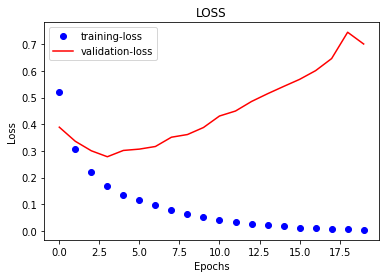

In [33]:
loss = history_dict['loss']
acc =  history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

epochs = range(20)

plt.plot(epochs, loss, 'bo', label='training-loss')
plt.plot(epochs, val_loss, 'r', label='validation-loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LOSS')
plt.legend()
plt.show()

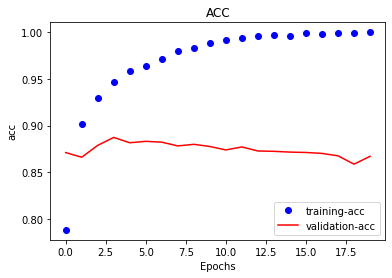

In [34]:
plt.plot(epochs, acc, 'bo', label='training-acc')
plt.plot(epochs, val_acc, 'r', label='validation-acc')

plt.xlabel('Epochs')
plt.ylabel('acc')
plt.title('ACC')
plt.legend()
plt.show()

### overfittig 고려하여 재학습

In [37]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile( optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size = 512, validation_data=(x_val,y_val))

result = model.evaluate(x_test, y_test)

Epoch 1/4
 1/49 [..............................] - ETA: 16s - loss: 0.6991 - accuracy: 0.4902

2022-05-08 18:54:10.282311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 2s 26ms/step - loss: 0.4562 - accuracy: 0.8216 - val_loss: 0.2831 - val_accuracy: 0.9158
Epoch 2/4
 1/49 [..............................] - ETA: 0s - loss: 0.2883 - accuracy: 0.9043

2022-05-08 18:54:11.553759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 14ms/step - loss: 0.2604 - accuracy: 0.9107 - val_loss: 0.1951 - val_accuracy: 0.9395
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1999 - accuracy: 0.9276 - val_loss: 0.1629 - val_accuracy: 0.9455
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3030 - accuracy: 0.8821


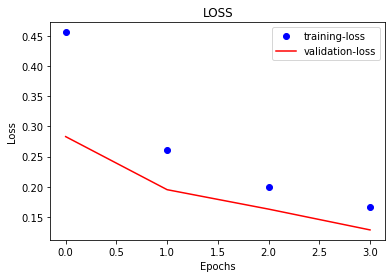

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(4)

plt.plot(epochs, loss, 'bo', label='training-loss')
plt.plot(epochs, val_loss, 'r', label='validation-loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LOSS')
plt.legend()
plt.show()

In [39]:
result

[0.30297157168388367, 0.882080078125]

In [40]:
model.predict(x_test) # 0~1의 확률값. 1에 가까울수록 긍정으로 예측합니다. 

2022-05-08 18:56:21.630296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.1479591 ],
       [0.99800986],
       [0.74249613],
       ...,
       [0.07733873],
       [0.04024633],
       [0.60433865]], dtype=float32)

## 다중분류 (reuters 뉴스토픽)

In [57]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words= 10000)

print( len(train_data) )
print( len(test_data) )

8982
2246


In [58]:
word_index = reuters.get_word_index() # imdb dataset 정의된 문장 : 빈도 수 딕셔너리 사전.
word_index

r_word_index = dict( [(value, key) for (key,value) in word_index.items() ] ) # index : key 값 으로 순서 바꿈
r_word_index

dec = ' '.join( [r_word_index[i] for i in train_data[0]] ) # train [0] 번 문장 decode
dec

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [59]:
train_labels[0] # train [0] 번 문장 = 3번 토픽으로 분류.

3

### input data -> vetorize 

In [60]:
def vectorize_seq(seq, dimension=10000):
    results = np.zeros((len(seq), dimension))
    for i, s in enumerate(seq):
        results[i, s] = 1.
        
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

### label one-hot encoding

In [61]:
import numpy as np

def one_hot_encoding(seq, dimension = 10000): # seq : 숫자 index 정보를 갖고 있는 한 문장의 리스트 / dimension : 단어 1만개 one-hot encoding
        results = np.zeros(( len(seq) , dimension ))
        for idx, s in enumerate(seq):
            results[idx, s] = 1.0
            
        return results

one_hot_train_labels = one_hot_encoding(train_labels)
one_hot_test_labels = one_hot_encoding(test_labels)

In [63]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels.shape

(8982, 46)

### 모델링

In [65]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                640064    
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [66]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [67]:
history = model.fit( partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20


2022-05-11 20:59:48.562090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 36ms/step - loss: 2.5964 - accuracy: 0.5190 - val_loss: 1.7100 - val_accuracy: 0.6540
Epoch 2/20
 1/16 [>.............................] - ETA: 0s - loss: 1.5471 - accuracy: 0.7012

2022-05-11 20:59:49.516360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 15ms/step - loss: 1.3771 - accuracy: 0.7160 - val_loss: 1.2690 - val_accuracy: 0.7350
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0105 - accuracy: 0.7850 - val_loss: 1.1015 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7947 - accuracy: 0.8339 - val_loss: 1.0171 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6268 - accuracy: 0.8686 - val_loss: 0.9471 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5026 - accuracy: 0.8948 - val_loss: 0.9181 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4018 - accuracy: 0.9158 - val_loss: 0.8986 - val_accuracy: 0.8210
Epoch 8/20
16/16 [==============================] - 0s 14ms/step - loss: 0.3236 - accuracy: 0.9325 - val_loss: 0.9004 - val_accuracy: 0.8190
Epoch 9/20
16/16 [======

In [74]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

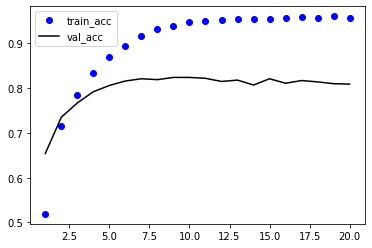

In [84]:
plt.clf() # clear figure

acc=history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = "train_acc")
plt.plot(epochs, val_acc, 'black', label = "val_acc")
plt.legend()
plt.show()

In [ ]:
## 8~9번째부터 accuracy 떨어짐 (과대적합) epochs 조절

### overfitting 고려하여 재학습

In [85]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

model.fit( partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
 5/16 [========>.....................] - ETA: 0s - loss: 3.4074 - accuracy: 0.3785

2022-05-11 21:18:15.980928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 26ms/step - loss: 2.5602 - accuracy: 0.5314 - val_loss: 1.6758 - val_accuracy: 0.6630
Epoch 2/9
 8/16 [==============>...............] - ETA: 0s - loss: 1.4528 - accuracy: 0.7043

2022-05-11 21:18:16.451768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 16ms/step - loss: 1.3630 - accuracy: 0.7220 - val_loss: 1.2528 - val_accuracy: 0.7270
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0084 - accuracy: 0.7895 - val_loss: 1.1057 - val_accuracy: 0.7570
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.7904 - accuracy: 0.8339 - val_loss: 0.9966 - val_accuracy: 0.7930
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6260 - accuracy: 0.8710 - val_loss: 0.9530 - val_accuracy: 0.8070
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4979 - accuracy: 0.8973 - val_loss: 0.9361 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.3993 - accuracy: 0.9188 - val_loss: 0.9139 - val_accuracy: 0.8080
Epoch 8/9
16/16 [==============================] - 0s 14ms/step - loss: 0.3225 - accuracy: 0.9307 - val_loss: 0.9106 - val_accuracy: 0.8160
Epoch 9/9
71/71 [=============

In [86]:
results # loss , accuracy 약 79.3% 정확도.

[0.9807048439979553, 0.7934105396270752]

## Regression 보스턴 집값예측

In [2]:
from keras.datasets import boston_housing

(x_train, train_targets), (x_test, test_targets) = boston_housing.load_data()
print(f"x_train : {x_train.shape}" )
print(f"x_test : {x_test.shape}" )

x_train : (404, 13)
x_test : (102, 13)


In [3]:
print( min( train_targets[:] ))
print( max( train_targets[:] ))

5.0
50.0


In [ ]:
## time series anomaly detection using an AutoEncoder